Name: Neha Shrestha

Section:L6CG19

Worksheet4

# Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.

**Task 1: Data Preparation**

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define dataset paths
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/DevanagariHandwrittenDigitDataset/Test"
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/DevanagariHandwrittenDigitDataset/Train"

# Image size
IMG_SIZE = (28, 28)
NUM_CLASSES = 10  # Digits 0-9

def load_data(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get sorted folder names (digits 0-9)
    class_map = {name: i for i, name in enumerate(class_names)}  # Label mapping

    for label in class_names:
        class_path = os.path.join(data_dir, label)
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize(IMG_SIZE)  # Resize to 28x28
            img_array = np.array(img) / 255.0  # Normalize (0-1)
            images.append(img_array)
            labels.append(class_map[label])

    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Reshape images for FCN (Flattened)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Split training data into train & validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Task 2: Build the FCN Model**

In [3]:
# Build Fully Connected Network (FCN) model
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(28*28,)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer
])
# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

**Task 3: Compile the Model**

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Task 4: Train the Model**

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2130 - loss: 2.2567 - val_accuracy: 0.7302 - val_loss: 1.2451
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7660 - loss: 0.9606 - val_accuracy: 0.8276 - val_loss: 0.5225
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8709 - loss: 0.4284 - val_accuracy: 0.9065 - val_loss: 0.3256
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9303 - loss: 0.2601 - val_accuracy: 0.9246 - val_loss: 0.2464
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9532 - loss: 0.1809 - val_accuracy: 0.9408 - val_loss: 0.1989
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9649 - loss: 0.1331 - val_accuracy: 0.9469 - val_loss: 0.1768
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9709 - loss: 0.1111 - val_accuracy: 0.9496 - val_loss: 0.1599
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9745 - loss: 0.0977 - val_accura

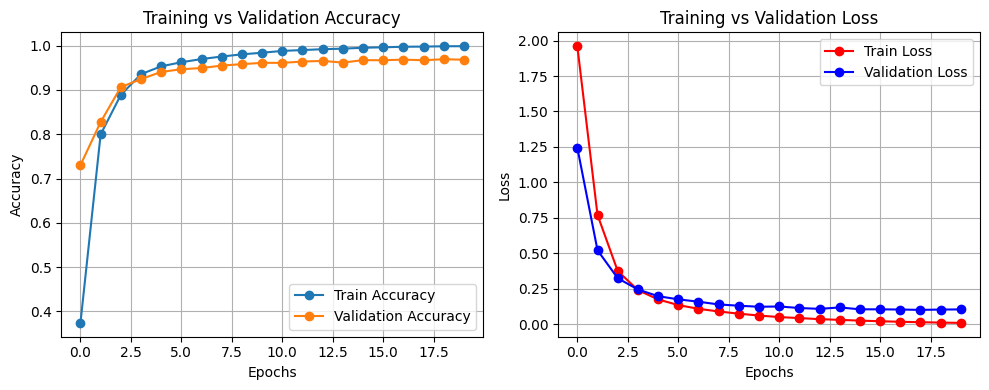

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9826 - loss: 0.0670
Test Accuracy: 0.9804


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

# 📊 Visualization - Training & Validation Accuracy/Loss
import matplotlib.pyplot as plt

# Extract accuracy and loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy", marker='o')
plt.plot(val_acc, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss", marker='o', color='r')
plt.plot(val_loss, label="Validation Loss", marker='o', color='b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


 **Task 5 : Evaluate the Model**

In [10]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0670
Test Accuracy: 0.9804


**Task 6 : Save and Load the Model**

In [11]:
# Save the model
model.save("devnagari_fcn_model.h5")

# Load the saved model
loaded_model = keras.models.load_model("devnagari_fcn_model.h5")

# Re-evaluate the loaded model
loaded_loss, loaded_acc = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Accuracy: {loaded_acc:.4f}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0670
Loaded Model Accuracy: 0.9804


**Task 7 : Predictions**

In [9]:
# Making Predictions
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display some predictions
print("Sample Predictions:", predicted_labels[:10])

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Sample Predictions: [0 0 0 0 0 0 0 0 0 0]
